In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import corner.corner

from impulse.base import Sampler, PTSampler

# test model things:
from test_model import make_sin_data, LnLikelihood, LnPrior

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


In [3]:
x, data, omega_real, a_real, phi_real = make_sin_data(1000)

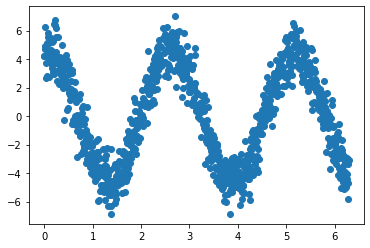

In [4]:
plt.scatter(x, data)

In [5]:
like = LnLikelihood(x, data)
prior = LnPrior([0, 0, 0], [3, 5, np.pi])

In [6]:
x0 = prior.initial_sample()
ndim = len(x0)

In [27]:
ntemps = 4
ncores = 4
sampler = Sampler(ndim, like, prior, ntemps=ntemps, ncores=ncores, adapt=True, tinf=True)
# sampler = PTSampler(ndim, like, prior)

In [28]:
x0 = np.vstack([prior.initial_sample() for i in range(ntemps)])
chain = sampler.sample(x0[0], num_samples=100_000, thin=1, ret_chain=True)

 56%|█████▌    | 55958/100000 [00:06<00:03, 12255.48it/s]/Users/aaron/Documents/GitHub/impulse_mcmc/impulse/proposals.py:253: RuntimeWarning: invalid value encountered in double_scalars
(PTSampler pid=44497)   q[groups[jumpind][ii]] += scale * sigma
(PTSampler pid=44497) /Users/aaron/Documents/GitHub/impulse_mcmc/impulse/mhsampler.py:23: RuntimeWarning: invalid value encountered in double_scalars
(PTSampler pid=44497)   lnprob_star = 1 / temp * lnlike_star + lnprior_star
 98%|█████████▊| 98401/100000 [00:11<00:00, 9729.14it/s]


In [29]:
burn = int(0.25 * chain.shape[0])
omega = np.median(chain[burn:, 0])
a = np.median(chain[burn:, 1])
phi = np.median(chain[burn:, 2])

AttributeError: 'list' object has no attribute 'shape'

In [21]:
print(omega, omega_real)
print(a, a_real)
print(phi, phi_real)

2.4626972523937822 2.4592735346765124
4.5727467109341156 4.564389857883876
1.4041552800335684 1.4171009757463402


In [24]:
with open('./chains/temp_data/temps.txt', 'r') as f:
    temps = np.loadtxt(f)

with open('./chains/temp_data/accept.txt', 'r') as f:
    accept = np.loadtxt(f)

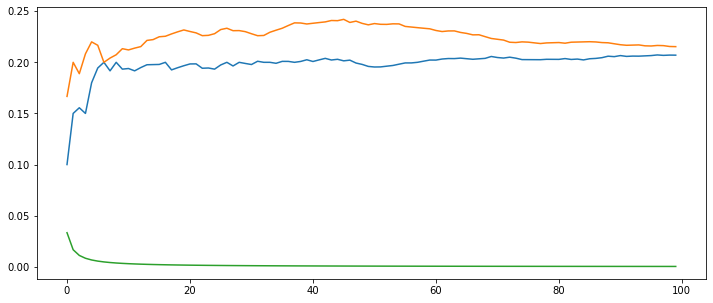

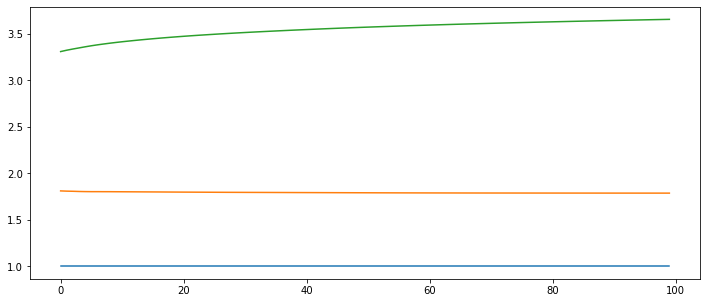

In [25]:
plt.figure(figsize=(12, 5))
for ii in range(ntemps - 1):
    # plt.plot(temps[:, ii])
    plt.plot(accept[:, ii])
plt.show()

plt.figure(figsize=(12, 5))
for ii in range(ntemps - 1):
    plt.plot(temps[:, ii])
    # plt.plot(accept[:, ii])
plt.show()

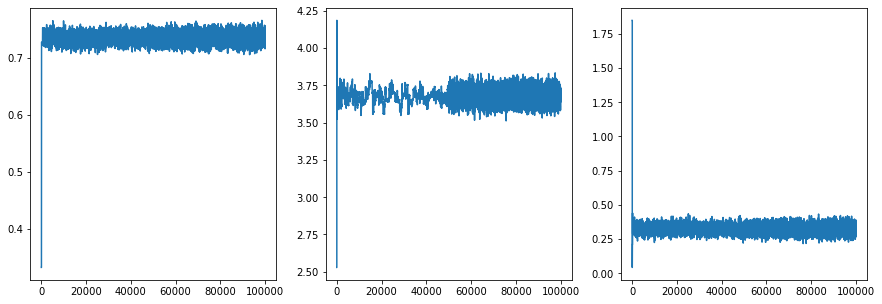

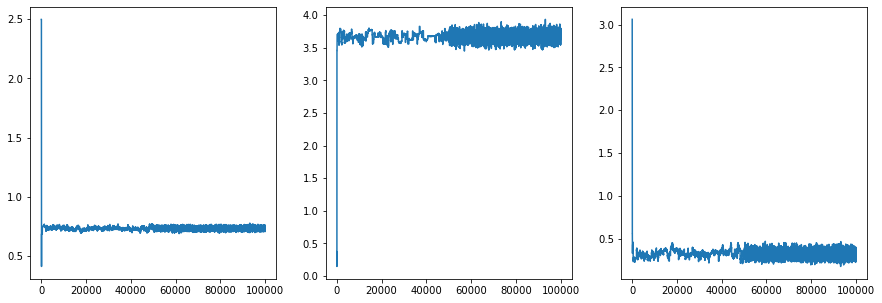

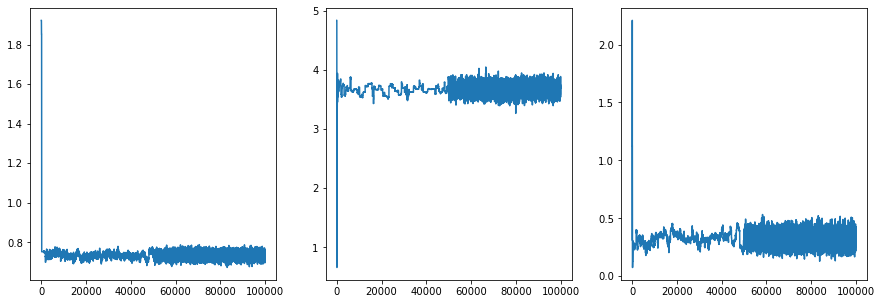

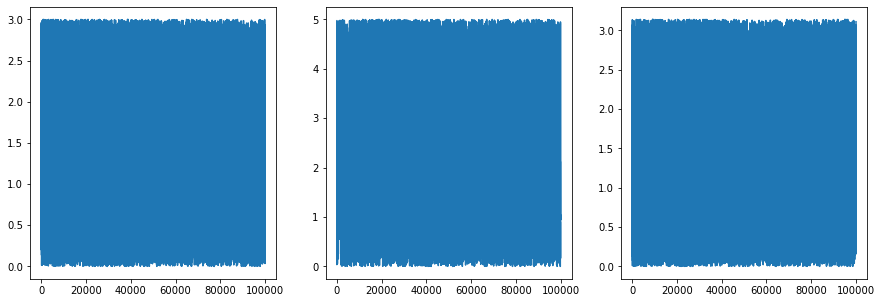

In [26]:
for ii in range(ntemps):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].plot(chain[:, 0, ii])
    ax[1].plot(chain[:, 1, ii])
    ax[2].plot(chain[:, 2, ii])
    plt.show()

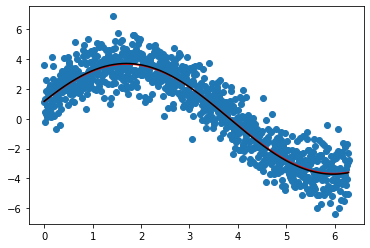

In [27]:
plt.scatter(x, data)
plt.plot(x, a * np.sin(omega * x + phi), color='red')
plt.plot(x, a_real * np.sin(omega_real * x + phi_real), color='black')

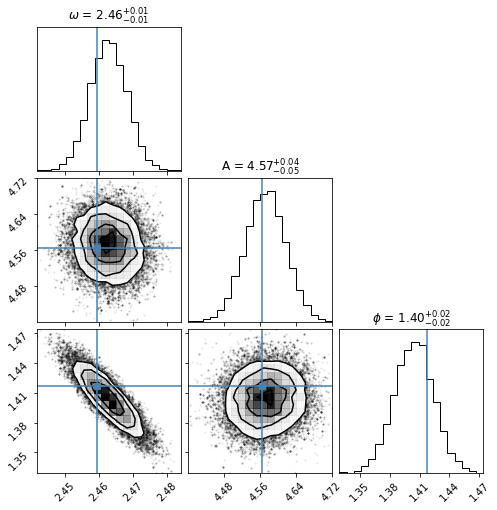

In [23]:
corner.corner(chain[2 * burn:, :], truths=[omega_real, a_real, phi_real],
              titles=[r'$\omega$', r'A', r'$\phi$'], show_titles=True)
plt.show()

In [29]:
print(omega_real, a_real, phi_real)
print(omega, a, phi)

0.7360712352514645 3.713929302409257 0.3217522589350493
0.7340739688761305 3.6748920204509266 0.322736913968617


In [30]:
sampler.ptswap.compute_accept_ratio()

array([0.207     , 0.21533333, 0.00033333])

In [31]:
sampler.ptswap.adapt_ladder()

In [32]:
sampler.ptswap.ladder

array([1.        , 1.78844903, 3.65848449,        inf])